In [16]:
import polars
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
data: polars.DataFrame = polars.read_csv("gene_expression.csv")
data.head()

Gene One,Gene Two,Cancer Present
f64,f64,i64
4.3,3.9,1
2.5,6.3,0
5.7,3.9,1
6.1,6.2,0
7.4,3.4,1


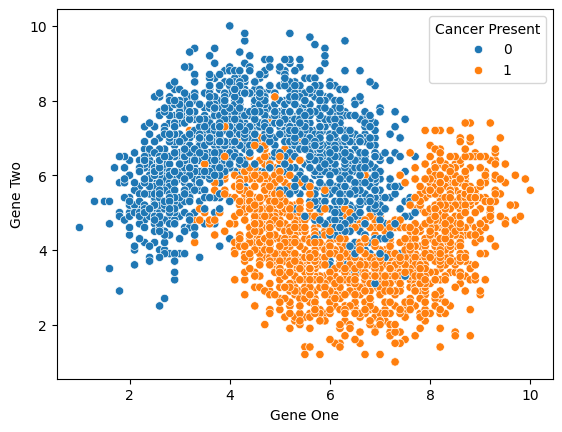

In [10]:
sns.scatterplot(data, x="Gene One", y="Gene Two", hue="Cancer Present")
plt.show()

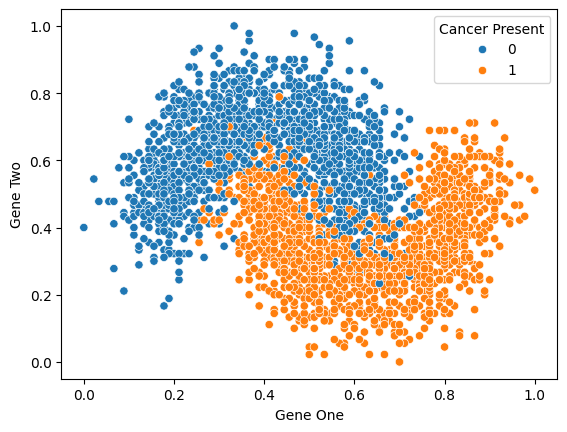

In [13]:
scaler = MinMaxScaler()
data[["Gene One", "Gene Two"]] = scaler.fit_transform(data[["Gene One", "Gene Two"]])
sns.scatterplot(data, x="Gene One", y="Gene Two", hue="Cancer Present")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = data[["Gene One", "Gene Two"]]
y = data["Cancer Present"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, classification_report

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.81      0.86      0.84       272

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



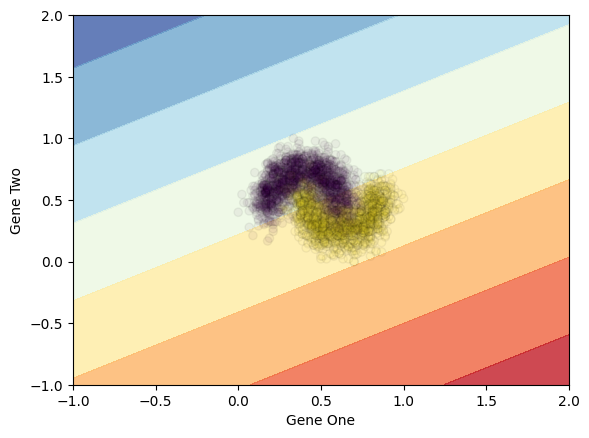

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

display = DecisionBoundaryDisplay.from_estimator(model, data[["Gene One", "Gene Two"]].to_pandas(), cmap=plt.cm.RdYlBu_r, xlabel="Gene One", ylabel="Gene Two", alpha=0.8)
display.ax_.scatter(data["Gene One"], data["Gene Two"], c=data["Cancer Present"], edgecolor="black", alpha=0.05, marker="o", label="Test Data")
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



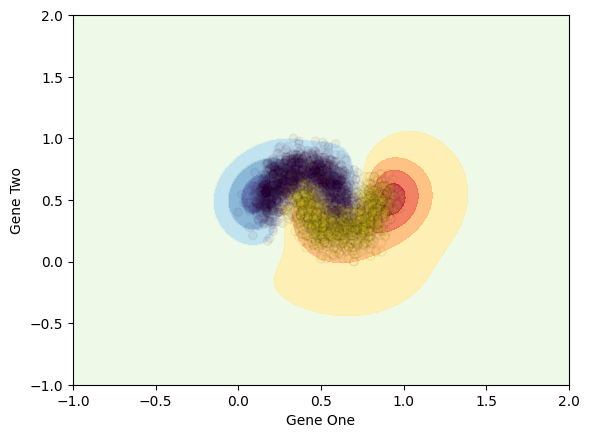

In [51]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

display = DecisionBoundaryDisplay.from_estimator(model, data[["Gene One", "Gene Two"]].to_pandas(), cmap=plt.cm.RdYlBu_r, xlabel="Gene One", ylabel="Gene Two", alpha=0.8)
display.ax_.scatter(data["Gene One"], data["Gene Two"], c=data["Cancer Present"], edgecolor="black", alpha=.05, marker="o", label="Test Data")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       328
           1       0.91      0.91      0.91       272

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



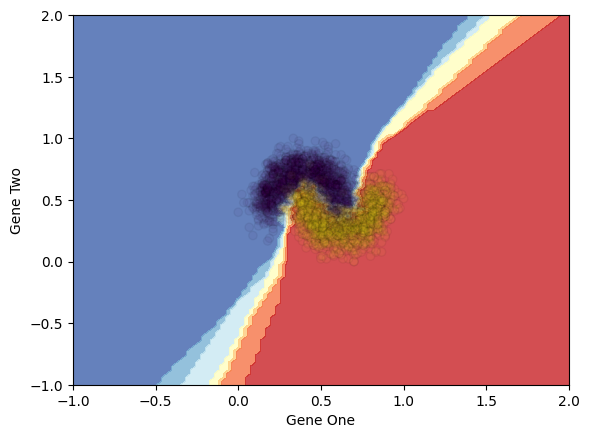

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

display = DecisionBoundaryDisplay.from_estimator(model, data[["Gene One", "Gene Two"]].to_pandas(), cmap=plt.cm.RdYlBu_r, xlabel="Gene One", ylabel="Gene Two", alpha=0.8)
display.ax_.scatter(data["Gene One"], data["Gene Two"], c=data["Cancer Present"], edgecolor="black", alpha=.05, marker="o", label="Test Data")
plt.show()